<a href="https://colab.research.google.com/github/Usharamesh-R/NM-PHASE2/blob/main/Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving city_data_set.csv to city_data_set.csv
Initial shape: (29531, 16)

Missing values after cleaning:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


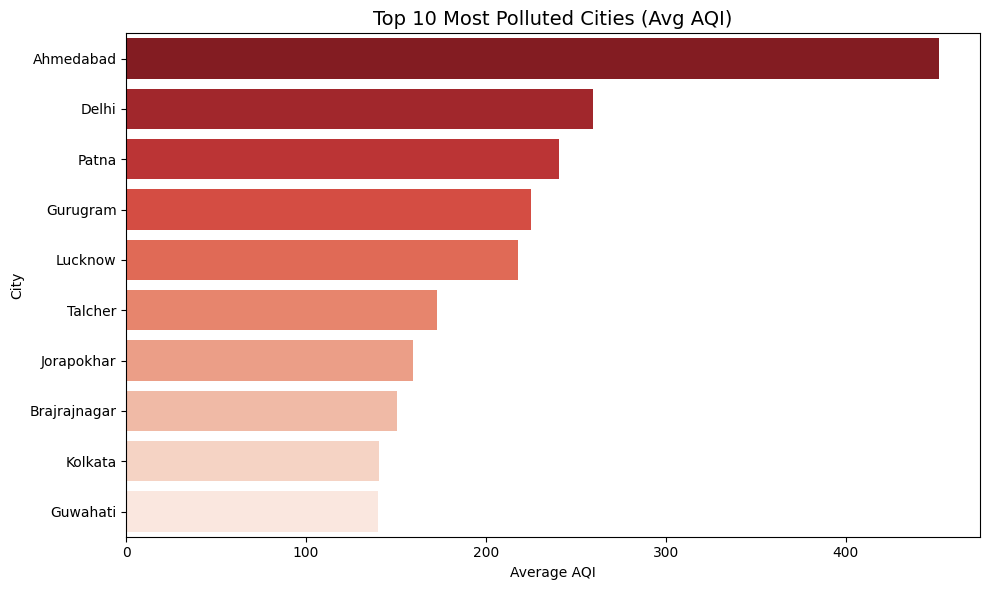

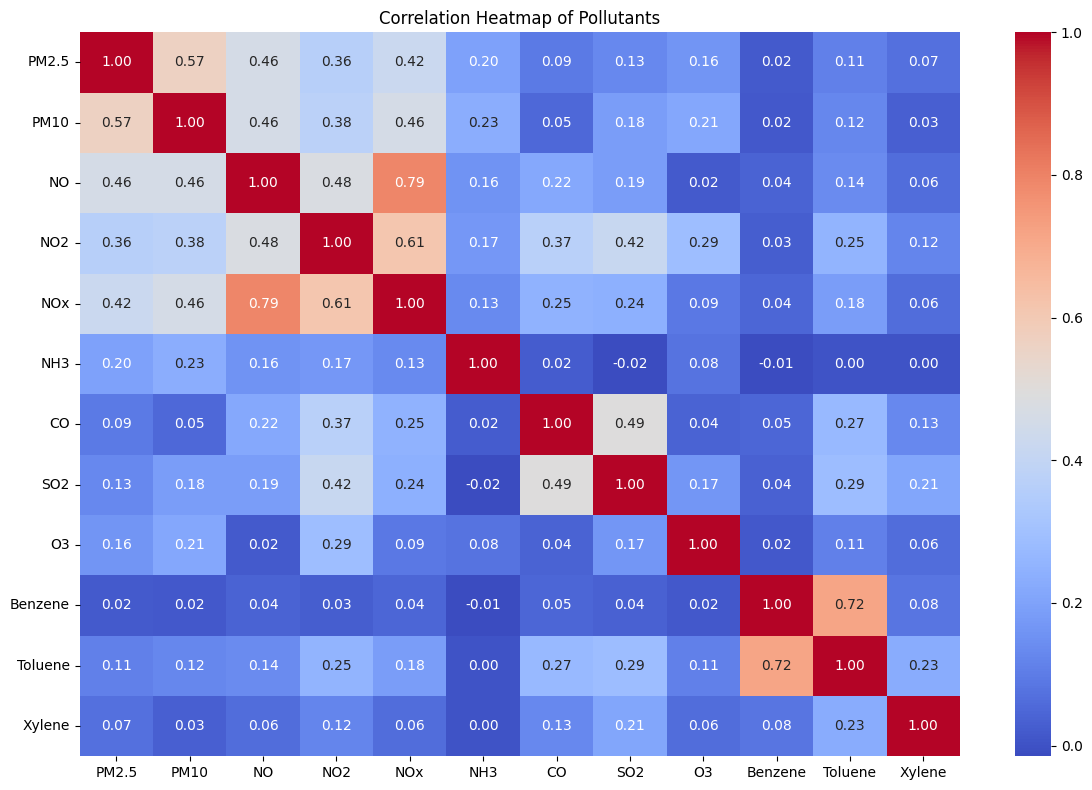

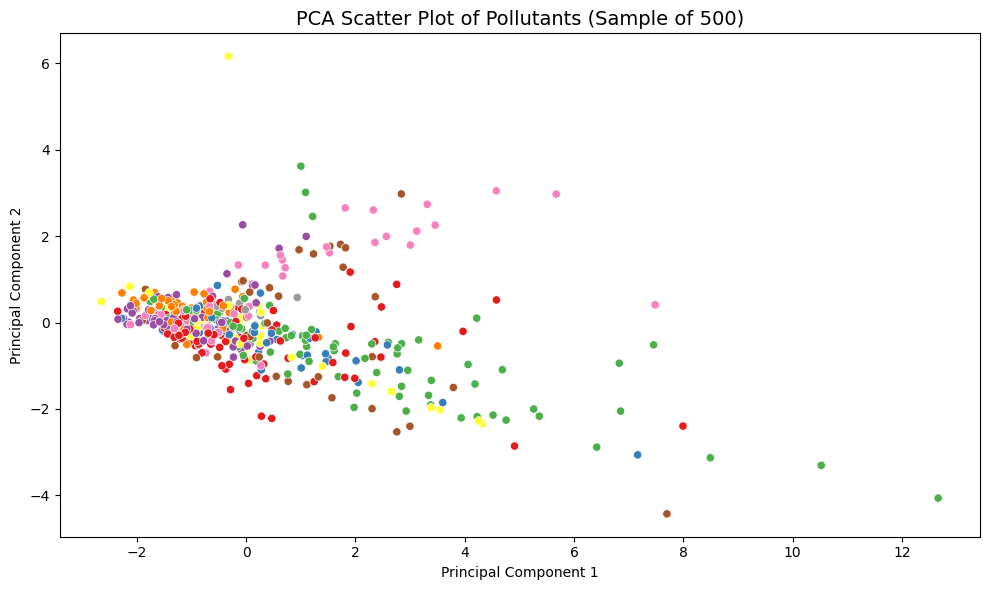

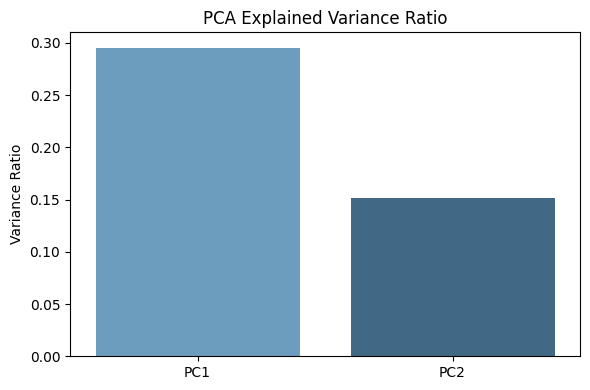


PCA Explained Variance Ratios:
PC1: 29.53%
PC2: 15.13%


In [1]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# === 2. Upload and Read Data ===
from google.colab import files
uploaded = files.upload()

# Replace with your exact file name if needed
df = pd.read_csv('city_data_set.csv')

# === 3. Initial Exploration and Cleaning ===
print("Initial shape:", df.shape)
df = df.dropna(subset=['AQI'])  # Drop rows where AQI is missing

# Fill missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())

# === 4. EDA: Top 10 Polluted Cities (Average AQI) ===
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.title('Top 10 Most Polluted Cities (Avg AQI)', fontsize=14)
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# === 5. EDA: Pollutant Correlation Heatmap ===
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
              'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df_pollutants = df[pollutants].copy()
df_pollutants.fillna(0, inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_pollutants.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants')
plt.tight_layout()
plt.show()

# === 6. PCA for Dimensionality Reduction ===
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pollutants)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='City', data=df.sample(500), legend=False, palette='Set1')
plt.title('PCA Scatter Plot of Pollutants (Sample of 500)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# === 7. PCA Explained Variance Plot ===
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_variance))], y=explained_variance, palette='Blues_d')
plt.title('PCA Explained Variance Ratio')
plt.ylabel('Variance Ratio')
plt.tight_layout()
plt.show()

# === 8. Summary Stats ===
print("\nPCA Explained Variance Ratios:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2%}")